#KNN

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read in the data using pandas
url = 'https://raw.githubusercontent.com/RBellaApriliaDamayanti22/project/main/synthetic.csv'
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,0,1,-4,13.824238,3,3,261,-3,1
1,1,1,38,11.836095,5,2,63,9,1
2,2,2,40,11.707228,5,1,4,1,0
3,3,1,31,13.016381,17,1,56,3,0
4,4,1,32,6.945001,-2,1,56,9,0


In [ ]:
##create a dataframe with all training data except the target column
X = df.drop(columns=['Result_of_Treatment'])
##check that the target variable has been removed
X.head()

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter
0,0,1,-4,13.824238,3,3,261,-3
1,1,1,38,11.836095,5,2,63,9
2,2,2,40,11.707228,5,1,4,1
3,3,1,31,13.016381,17,1,56,3
4,4,1,32,6.945001,-2,1,56,9


In [ ]:
#separate target values
y = df['Result_of_Treatment'].values
#view target values
y[0:5]

array([1, 1, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 23)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=23)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.46666667 0.35       0.51666667 0.61666667 0.65      ]
cv_scores mean:0.52


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 24}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5266666666666666

In [ ]:
# Calculating error for K values between 2 and 10
#error = []
#import matplotlib.pyplot as plt
#for i in range(2, 10):
 #   knn = KNeighborsClassifier(n_neighbors=i)
 #   knn.fit(X_train, y_train)
 #   pred_i = knn.predict(X_test)
 #   error.append(np.mean(pred_i != y_test))
#plt.figure(figsize=(12, 6))
#plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
 #        markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

#NAIVE BAYES

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[10 11]
 [ 4 35]]
accuracy_Naive Bayes: 0.750
precision_Naive Bayes: 0.750
recall_Naive Bayes: 0.750
f1-score_Naive Bayes : 0.750


#Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


# Ensemble Bagging
https://www.section.io/engineering-education/implementing-bagging-algorithms-in-python/

In [23]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/RBellaApriliaDamayanti22/project/main/synthetic.csv")
df.head()

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,0,1,-4,13.824238,3,3,261,-3,1
1,1,1,38,11.836095,5,2,63,9,1
2,2,2,40,11.707228,5,1,4,1,0
3,3,1,31,13.016381,17,1,56,3,0
4,4,1,32,6.945001,-2,1,56,9,0


In [24]:
df.isnull().sum()

Unnamed: 0             0
sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [26]:
X = df.drop("Result_of_Treatment",axis="columns")
y = df.Result_of_Treatment

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled[:3]

array([[-1.7262869 , -0.55681565, -3.01780454,  1.04255564, -0.03796342,
         1.34442799,  1.10215155, -0.84025199],
       [-1.71473983, -0.55681565,  0.25817868,  0.56671663,  0.38385236,
         0.05170877, -0.28511329,  0.0836659 ],
       [-1.70319276,  1.79592653,  0.41417788,  0.53587389,  0.38385236,
        -1.24101046, -0.69849018, -0.53227936]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)


In [30]:
X_train.shape

(225, 8)

In [31]:
X_test.shape

(75, 8)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.45      , 0.41666667, 0.28333333, 0.58333333, 0.63333333])

In [34]:
scores.mean()

0.47333333333333333

In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [37]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [38]:
bag_model.oob_score_

0.5955555555555555

In [39]:
bag_model.score(X_test, y_test)

0.6533333333333333

In [40]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<function matplotlib.pyplot.show(*args, **kw)>

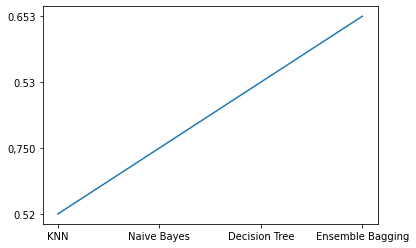

In [43]:
#membuat grafik

x = np.array(['KNN','Naive Bayes','Decision Tree','Ensemble Bagging'])
y = np.array(['0.52','0,750','0.53','0.653'])

plt.plot(x,y)
plt.show